<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [3]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [5]:
data = pd.read_csv('./train.csv')

In [6]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [7]:
data.sample(10)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1707,0,73.35,,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0
194,29,80.15,2265.25,Male,0,Yes,No,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),1
351,25,71.05,1837.7,Female,0,Yes,No,Yes,No,DSL,Yes,Yes,No,Yes,No,Yes,Month-to-month,Yes,Mailed check,0
3563,28,105.80,2998,Male,1,Yes,No,Yes,Yes,Fiber optic,No,Yes,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,0
585,57,100.75,5985,Female,0,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),0
339,4,78.45,330.05,Male,0,No,No,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,Month-to-month,No,Electronic check,1
4209,68,86.45,5762.95,Female,0,Yes,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,No,One year,No,Credit card (automatic),0
1879,2,24.90,49.7,Male,0,No,No,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),0
5205,59,99.50,5890,Female,1,No,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,One year,Yes,Electronic check,0
1495,72,65.65,4664.5,Male,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [9]:
data = data.replace(' ', np.nan)
data = data.dropna()

In [10]:
data['TotalSpent'] = data['TotalSpent'].astype('float64', copy=False)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5273 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5273 non-null   int64  
 1   MonthlySpending           5273 non-null   float64
 2   TotalSpent                5273 non-null   float64
 3   Sex                       5273 non-null   object 
 4   IsSeniorCitizen           5273 non-null   int64  
 5   HasPartner                5273 non-null   object 
 6   HasChild                  5273 non-null   object 
 7   HasPhoneService           5273 non-null   object 
 8   HasMultiplePhoneNumbers   5273 non-null   object 
 9   HasInternetService        5273 non-null   object 
 10  HasOnlineSecurityService  5273 non-null   object 
 11  HasOnlineBackup           5273 non-null   object 
 12  HasDeviceProtection       5273 non-null   object 
 13  HasTechSupportAccess      5273 non-null   object 
 14  HasOnlin

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

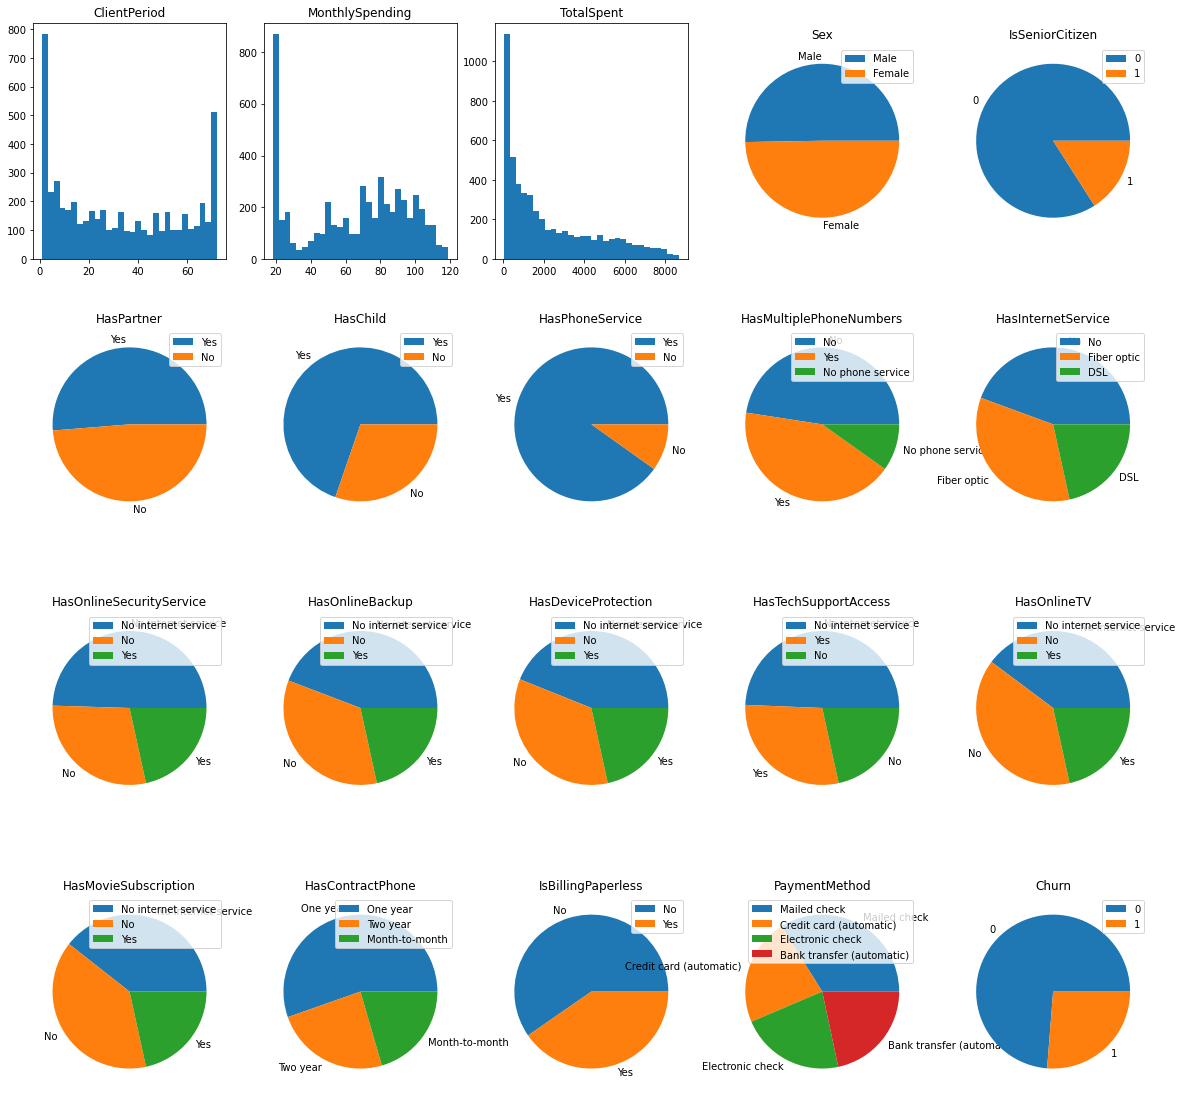

In [12]:
fig, axes = plt.subplots(4, 5, figsize=(20, 20))
n=0
for i in range(0,4):
    for j in range(0,5):
        if data.columns[n] in num_cols:
            axes[i,j].hist(data[data.columns[n]], bins = 30)
            axes[i,j].set_title(data.columns[n])
            
        else:
            axes[i,j].pie(data[data.columns[n]].value_counts(), labels = data[data.columns[n]].unique())
            axes[i,j].set_title(data.columns[n])
            axes[i,j].legend()
        n+=1

Примеров класса 0 примерно 3 раза больше, что не так много. Следовательно можно считать классы сбалансированными

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [13]:
# YOUR CODE

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [14]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

In [15]:
#1способ(using GridSearchCV)
num_indices = [0,1,2]
cat_indices = list(range(3,19))
num_features = data.columns[num_indices]
cat_features = data.columns[cat_indices]

In [16]:
num_transformer = Pipeline([('scaler', StandardScaler())])
cat_transformer = Pipeline([('onehot',OneHotEncoder())])

In [17]:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer([
 ('num', num_transformer, num_features),
 ('cat', cat_transformer, cat_features)])

In [18]:
pl = make_pipeline(
                   preprocessor,
                   LogisticRegression()
)

In [19]:
def search(X, y, model, grid_params, param_scale='log', draw = True):
    print(grid_params)
    CV_model = GridSearchCV(estimator=model, 
                            param_grid=grid_params,
                            cv=5, 
                            refit=True,
                            scoring='roc_auc',
                            n_jobs=-1, 
                            verbose=10,
                            )
    CV_model.fit(X, y)
    means = CV_model.cv_results_['mean_test_score']
    error = CV_model.cv_results_['std_test_score']
    print(CV_model.best_estimator_.get_params)
    quality = roc_auc_score(y, CV_model.best_estimator_.predict(X))
    
    return means, error, quality

In [20]:
models = [pl]
grid_params = [{ 'logisticregression__penalty' : ['l1', 'l2', 'elasticnet'],
                 'logisticregression__C' : [100, 10, 1, 0.1, 0.01, 0.001],
                 'logisticregression__solver': ['saga'],
                 'logisticregression__l1_ratio' : [0.01, 0.1, 1]
                 
}]

In [21]:
X = data[data.columns[list(range(0,19))]]
y = data[data.columns[19]]

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, 
                                                    train_size=0.8,
                                                    random_state=42)

In [455]:
search(X, y, model, grid_params)

[{'logisticregression__penalty': ['l1', 'l2', 'elasticnet'], 'logisticregression__C': [100, 10, 1, 0.1, 0.01, 0.001], 'logisticregression__solver': ['saga'], 'logisticregression__l1_ratio': [0.01, 0.1, 1]}]
Fitting 5 folds for each of 54 candidates, totalling 270 fits


D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty))


<bound method Pipeline.get_params of Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['ClientPeriod', 'MonthlySpending', 'TotalSpent'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  Index(['Sex', 'IsSeniorCitizen', 'HasPartner', 'HasChild', 'HasPhoneService',
       'HasMultiplePhoneNumbers', 'HasInternetService',
       'HasOnlineSecurityService', 'HasOnlineBackup', 'HasDeviceProtection',
       'HasTechSupportAccess', 'HasOnlineTV', 'HasMovieSubscription',
       'HasContractPhone',

D:\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


(array([0.8448209 , 0.84482738, 0.84481809, 0.84482088, 0.84482737,
        0.84482087, 0.84482182, 0.84482459, 0.84481066, 0.84485069,
        0.84480885, 0.84480793, 0.84485069, 0.84481629, 0.84483023,
        0.84485998, 0.84480792, 0.84485906, 0.84461486, 0.84470596,
        0.84470039, 0.84461858, 0.84470503, 0.8446558 , 0.84461858,
        0.84470782, 0.84461672, 0.84339886, 0.84381276, 0.84382485,
        0.84340072, 0.84381183, 0.84387036, 0.84339607, 0.84381276,
        0.84339701, 0.82952723, 0.84128823, 0.84139228, 0.82952352,
        0.84128822, 0.84122116, 0.82951981, 0.84128637, 0.82952445,
        0.5       , 0.8372028 , 0.83708604, 0.5       , 0.83720095,
        0.83178929, 0.5       , 0.83720187, 0.5       ]),
 array([0.01143548, 0.01143231, 0.01143276, 0.01143872, 0.01142621,
        0.0114262 , 0.01143301, 0.01143013, 0.01143376, 0.01150862,
        0.01144194, 0.01144594, 0.01150731, 0.01143652, 0.01145766,
        0.01150478, 0.01143955, 0.01150347, 0.01143343, 0.

In [23]:
#1способ
num_indices = [0,1,2]
cat_indices = list(range(3,19))
#One-hot кодирование для категориальных признаков
dummy_features = pd.get_dummies(data[data.columns[cat_indices]])

In [24]:
#нормировка числовых признаков
scaler = StandardScaler()
numeric_features = pd.DataFrame(scaler.fit_transform(data[data.columns[num_indices]]), columns = ['ClientPeriod', 'MonthlySpending', 'TotalSpent'])

In [25]:
data2 = pd.concat([numeric_features, dummy_features, data[data.columns[19]]], axis=1, join = 'inner')
data2

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,...,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,0.919099,-1.506436,-0.557582,0,0,1,0,1,0,1,...,0,1,0,1,0,0,0,0,1,0
1,1.612060,-1.295997,-0.184763,0,0,1,0,1,1,0,...,0,0,1,1,0,0,1,0,0,0
2,-1.282072,0.362658,-0.976504,0,0,1,1,0,1,0,...,1,0,0,0,1,0,0,1,0,1
3,-0.018437,0.475334,0.122800,1,1,0,0,1,1,0,...,1,0,0,1,0,0,0,0,1,0
4,1.122911,1.666716,1.968909,0,1,0,0,1,0,1,...,0,0,1,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5268,-1.200547,-1.145210,-0.973749,0,1,0,0,1,0,1,...,0,0,1,1,0,0,1,0,0,0
5269,0.715287,-0.679594,-0.045372,0,1,0,0,1,0,1,...,1,0,0,0,1,0,0,0,1,0
5270,-1.282072,-0.328310,-0.985693,0,0,1,1,0,1,0,...,1,0,0,0,1,0,0,1,0,1
5271,-0.140724,0.365972,-0.033560,0,0,1,1,0,1,0,...,0,1,0,0,1,1,0,0,0,0


In [26]:
y = data2[data2.columns[45]]
y

0       0
1       0
2       1
3       0
4       0
       ..
5268    0
5269    0
5270    1
5271    0
5272    0
Name: Churn, Length: 5264, dtype: int64

In [27]:
X = data2[data2.columns[list(range(0,45))]]
X

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,...,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.919099,-1.506436,-0.557582,0,0,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1
1,1.612060,-1.295997,-0.184763,0,0,1,0,1,1,0,...,0,0,0,1,1,0,0,1,0,0
2,-1.282072,0.362658,-0.976504,0,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
3,-0.018437,0.475334,0.122800,1,1,0,0,1,1,0,...,0,1,0,0,1,0,0,0,0,1
4,1.122911,1.666716,1.968909,0,1,0,0,1,0,1,...,1,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5268,-1.200547,-1.145210,-0.973749,0,1,0,0,1,0,1,...,1,0,0,1,1,0,0,1,0,0
5269,0.715287,-0.679594,-0.045372,0,1,0,0,1,0,1,...,0,1,0,0,0,1,0,0,0,1
5270,-1.282072,-0.328310,-0.985693,0,0,1,1,0,1,0,...,1,1,0,0,0,1,0,0,1,0
5271,-0.140724,0.365972,-0.033560,0,0,1,1,0,1,0,...,1,0,1,0,0,1,1,0,0,0


In [28]:
def search_param(X, y, param_scale='ordinary', draw = True):
    
    CV_model = LogisticRegressionCV(
                            cv=5, 
                            scoring='roc_auc',
                            penalty = 'l1',      
                            refit=True,
                            solver = 'saga',
                            n_jobs=-1, 
                            verbose=10,
                            fit_intercept = True,
                            )
    CV_model.fit(X, y)
    params = CV_model.get_params()
    quality = roc_auc_score(y, CV_model.predict(X))
    print(params)
    print(quality)
    print(CV_model.C_)

In [29]:
search_param(X,y)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 1 epochs took 0 seconds
convergence after 1 epochs took 0 seconds
convergence after 1 epochs took 0 seconds
convergence after 1 epochs took 0 seconds
convergence after 14 epochs took 0 seconds
convergence after 14 epochs took 0 seconds
convergence after 14 epochs took 0 seconds
convergence after 16 epochs took 0 seconds
convergence after 14 epochs took 0 seconds
convergence after 14 epochs took 0 seconds
convergence after 11 epochs took 0 seconds
convergence after 11 epochs took 0 seconds
convergence after 7 epochs took 0 seconds
convergence after 7 epochs took 0 seconds
convergence after 4 epochs took 0 seconds
convergence after 2 epochs took 0 seconds
convergence after 5 epochs took 0 seconds
convergence after 2 epochs took 0 seconds
convergence after 2 epochs took 0 seconds
convergence after 2 epochs took 0 seconds
convergence after 1 epochs took 0 seconds
convergence after 3 epochs took 0 seconds
convergence after 1 epochs took 0 seconds
convergence after 1 epochs

[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.8s


convergence after 13 epochs took 1 seconds
convergence after 16 epochs took 0 seconds
convergence after 16 epochs took 0 seconds
convergence after 16 epochs took 0 seconds
convergence after 15 epochs took 0 seconds
convergence after 11 epochs took 0 seconds
convergence after 11 epochs took 0 seconds
convergence after 6 epochs took 0 seconds
convergence after 7 epochs took 0 seconds
convergence after 5 epochs took 0 seconds
convergence after 2 epochs took 0 seconds
convergence after 5 epochs took 0 seconds
convergence after 2 epochs took 0 secondsconvergence after 2 epochs took 0 seconds

convergence after 2 epochs took 0 seconds
convergence after 1 epochs took 0 seconds
convergence after 1 epochs took 0 seconds


[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    1.9s remaining:    1.2s


convergence after 15 epochs took 0 seconds
convergence after 15 epochs took 0 seconds
convergence after 15 epochs took 0 seconds
convergence after 11 epochs took 0 seconds
convergence after 7 epochs took 0 seconds
convergence after 5 epochs took 1 seconds
convergence after 2 epochs took 0 seconds
convergence after 2 epochs took 0 seconds


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.1s finished


convergence after 21 epochs took 0 seconds
{'Cs': 10, 'class_weight': None, 'cv': 5, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1.0, 'l1_ratios': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': -1, 'penalty': 'l1', 'random_state': None, 'refit': True, 'scoring': 'roc_auc', 'solver': 'saga', 'tol': 0.0001, 'verbose': 10}
0.7010325998155913
[21.5443469]


Выпишите какое лучшее качество и с какими параметрами вам удалось получить

roc-auc = 0.722955531163189 при C=10, l1_ratio=1, penalty='l1',
                                    solver='saga'

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [30]:
#!pip install catboost
import catboost

In [31]:
X_train_, X_test_, y_train_, y_test_ = train_test_split(X.values, y.values, 
                                                       train_size=0.8, 
                                                       random_state=42)

In [ ]:
boosting_model = catboost.CatBoostClassifier(n_estimators=200, 
                                             cat_features=cat_indices)

boosting_model.fit(X_train, y_train)
y_train_predicted = boosting_model.predict_proba(X_train)[:, 1]
y_test_predicted = boosting_model.predict_proba(X_test)[:, 1]

In [ ]:
train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

# Предсказания

In [ ]:
best_model = # какая-то предыдущая модель

SyntaxError: invalid syntax (<ipython-input-12-7d881febecc7>, line 1)

In [ ]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] = # best_model.predict_proba(X_test) / best_model.predict(X_test)
submission.to_csv('./my_submission.csv')

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.